--- Importing libraries ---

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt



from warnings import filterwarnings
filterwarnings('ignore')

--- Loading Dataset ---

In [2]:
file_path = "Used_car_data.csv"
df = pd.read_csv(file_path)

df.head()


,Name,Model,Company,Year,Fuel Type,KM Driven,Transmission Type,Price(in Lakh),Location
0,Hyundai Creta SX PLUS AT 1.6 PETROL,Creta SX PLUS AT 1.6 PETROL,Hyundai,2017,PETROL,98493,Automatic,973000,Bangalore
1,Renault Kwid 1.0 MARVEL IRON MAN EDITION AMT,Kwid 1.0 MARVEL IRON MAN EDITION AMT,Renault,2018,PETROL,19178,Automatic,407000,Bangalore
2,Hyundai Eon ERA PLUS (O),Eon ERA PLUS (O),Hyundai,2017,PETROL,33963,Manual,381000,Bangalore
3,Maruti Swift VXI,Swift VXI,Maruti,2012,PETROL,64557,Manual,463000,Bangalore
4,Hyundai Creta SX 1.6 DIESEL,Creta SX 1.6 DIESEL,Hyundai,2019,DIESEL,43987,Manual,1150000,Bangalore


--- EDA ---

In [3]:
print(df.Location.value_counts(), end = "\n--------------------\n")
print(df.Company.value_counts())

Location
Bangalore    1107
Mumbai        530
New Delhi     279
Kolkata       104
Name: count, dtype: int64
--------------------
Company
Maruti      713
Hyundai     582
Honda       231
Tata        173
Renault     160
Mahindra     87
KIA          74
Name: count, dtype: int64


In [4]:
"""--- Making copy of data ---"""

df_1 = df.copy()

df_1.isnull().sum()

Name                 0
Model                0
Company              0
Year                 0
Fuel Type            0
KM Driven            0
Transmission Type    0
Price(in Lakh)       0
Location             0
dtype: int64

In [5]:
"""---Location as "New Delhi"---"""

df_1 = df_1[(df_1 == "New Delhi").any(axis=1)]
print(df_1.Company.value_counts(), end = "\n--------------------\n")
print(df_1.shape)

Company
Maruti      110
Hyundai      62
Honda        41
Tata         26
Renault      16
KIA          14
Mahindra     10
Name: count, dtype: int64
--------------------
(279, 9)


In [6]:
"""---Selected Company "Maruti", "Hyundai", "Honda" & "Tata" in Selected Location "New Delhi"---"""

#df_for_maruti = df_1[df_1["Company"] == ("Maruti")]
#df_for_tata = df_1[df_1["Company"] == ("Tata")]

#---OR

df_comp = df_1[(df_1["Company"] == ("Maruti")) | (df_1["Company"] == ("Hyundai")) |
                (df_1["Company"] == ("Honda")) | (df_1["Company"] == ("Tata"))]

print(df_comp.Location.value_counts(), end = "\n--------------------\n")
print(df_comp.Company.value_counts())

Location
New Delhi    239
Name: count, dtype: int64
--------------------
Company
Maruti     110
Hyundai     62
Honda       41
Tata        26
Name: count, dtype: int64


In [7]:
df_comp

,Name,Model,Company,Year,Fuel Type,KM Driven,Transmission Type,Price(in Lakh),Location
1741,Maruti Alto 800 LXI,Alto 800 LXI,Maruti,2016,PETROL,97698,Manual,231000,New Delhi
1742,Maruti Swift VXI,Swift VXI,Maruti,2015,PETROL,102460,Manual,333000,New Delhi
1743,Hyundai Verna 1.6 VTVT SX,Verna 1.6 VTVT SX,Hyundai,2019,PETROL,34032,Manual,835000,New Delhi
1744,Maruti Baleno DELTA PETROL 1.2,Baleno DELTA PETROL 1.2,Maruti,2019,PETROL,35190,Manual,557000,New Delhi
1745,Tata NEXON XZ PLUS PETROL,NEXON XZ PLUS PETROL,Tata,2017,PETROL,82375,Manual,600000,New Delhi
...,...,...,...,...,...,...,...,...,...
2015,Maruti Baleno ZETA PETROL 1.2,Baleno ZETA PETROL 1.2,Maruti,2018,CNG,44307,Manual,566000,New Delhi
2016,Maruti Alto 800 LXI CNG,Alto 800 LXI CNG,Maruti,2017,CNG,54581,Manual,290000,New Delhi
2017,Maruti IGNIS DELTA 1.2 AMT,IGNIS DELTA 1.2 AMT,Maruti,2019,PETROL,8644,Automatic,521000,New Delhi
2018,Maruti Eeco 5 STR WITH A/C+HTR CNG,Eeco 5 STR WITH A/C+HTR CNG,Maruti,2019,CNG,62412,Manual,468000,New Delhi


In [8]:
"""---Removing unwanted column---"""

df_comp.drop("Name", inplace = True, axis = 1)

In [9]:
df_comp

,Model,Company,Year,Fuel Type,KM Driven,Transmission Type,Price(in Lakh),Location
1741,Alto 800 LXI,Maruti,2016,PETROL,97698,Manual,231000,New Delhi
1742,Swift VXI,Maruti,2015,PETROL,102460,Manual,333000,New Delhi
1743,Verna 1.6 VTVT SX,Hyundai,2019,PETROL,34032,Manual,835000,New Delhi
1744,Baleno DELTA PETROL 1.2,Maruti,2019,PETROL,35190,Manual,557000,New Delhi
1745,NEXON XZ PLUS PETROL,Tata,2017,PETROL,82375,Manual,600000,New Delhi
...,...,...,...,...,...,...,...,...
2015,Baleno ZETA PETROL 1.2,Maruti,2018,CNG,44307,Manual,566000,New Delhi
2016,Alto 800 LXI CNG,Maruti,2017,CNG,54581,Manual,290000,New Delhi
2017,IGNIS DELTA 1.2 AMT,Maruti,2019,PETROL,8644,Automatic,521000,New Delhi
2018,Eeco 5 STR WITH A/C+HTR CNG,Maruti,2019,CNG,62412,Manual,468000,New Delhi


In [10]:
df_comp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 239 entries, 1741 to 2019
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Model              239 non-null    object
 1   Company            239 non-null    object
 2   Year               239 non-null    int64 
 3   Fuel Type          239 non-null    object
 4   KM Driven          239 non-null    int64 
 5   Transmission Type  239 non-null    object
 6   Price(in Lakh)     239 non-null    int64 
 7   Location           239 non-null    object
dtypes: int64(3), object(5)
memory usage: 16.8+ KB


In [11]:
print(df_comp["Fuel Type"].value_counts(), end = "\n--------------------\n")
print(df_comp["Transmission Type"].value_counts())

Fuel Type
PETROL    209
CNG        21
DIESEL      9
Name: count, dtype: int64
--------------------
Transmission Type
Manual       191
Automatic     48
Name: count, dtype: int64


In [12]:
df_comp.describe

<bound method NDFrame.describe of                             Model  Company  Year Fuel Type  KM Driven  \
1741                 Alto 800 LXI   Maruti  2016    PETROL      97698   
1742                    Swift VXI   Maruti  2015    PETROL     102460   
1743            Verna 1.6 VTVT SX  Hyundai  2019    PETROL      34032   
1744      Baleno DELTA PETROL 1.2   Maruti  2019    PETROL      35190   
1745         NEXON XZ PLUS PETROL     Tata  2017    PETROL      82375   
...                           ...      ...   ...       ...        ...   
2015       Baleno ZETA PETROL 1.2   Maruti  2018       CNG      44307   
2016             Alto 800 LXI CNG   Maruti  2017       CNG      54581   
2017          IGNIS DELTA 1.2 AMT   Maruti  2019    PETROL       8644   
2018  Eeco 5 STR WITH A/C+HTR CNG   Maruti  2019       CNG      62412   
2019           IGNIS ZETA 1.2 AMT   Maruti  2020    PETROL      50179   

     Transmission Type  Price(in Lakh)   Location  
1741            Manual          23100

--- Visualisation ---

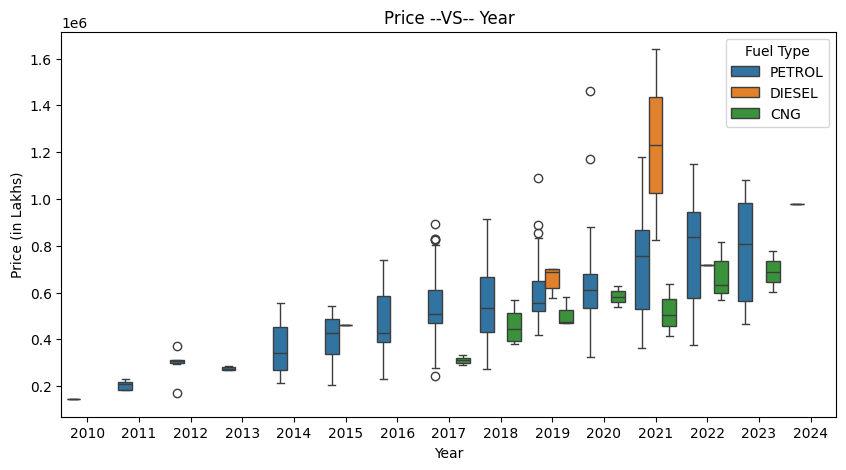

In [13]:
plt.figure(figsize=(10,5))
sns.boxplot(data = df_comp, x="Year", y="Price(in Lakh)", hue="Fuel Type")
plt.xlabel('Year')
plt.ylabel('Price (in Lakhs)')
plt.title("Price --VS-- Year")
plt.show()

<Figure size 400x700 with 0 Axes>

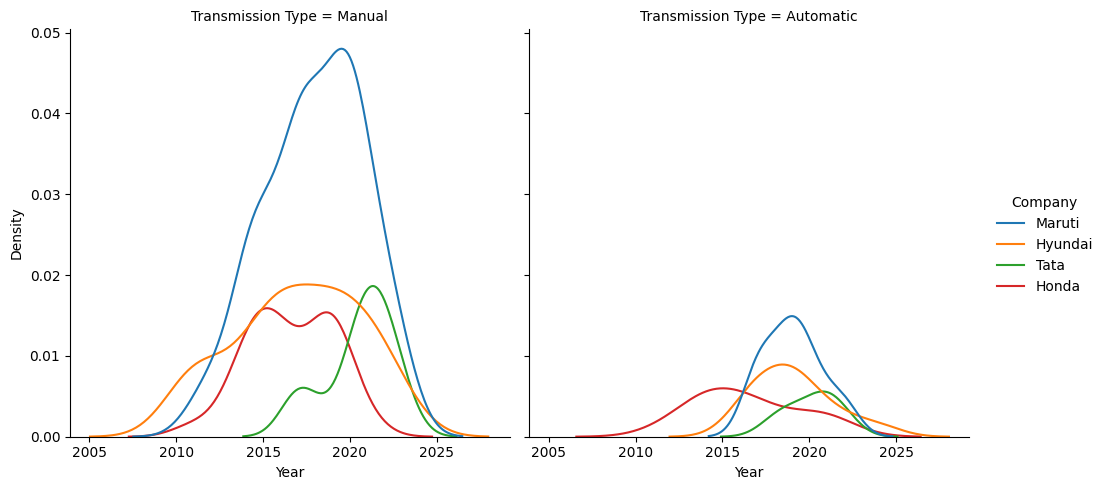

In [14]:
plt.figure(figsize=(4,7))
sns.displot(data = df_comp, x="Year", hue="Company", col="Transmission Type", kind="kde",)
plt.show()

<Figure size 500x600 with 0 Axes>

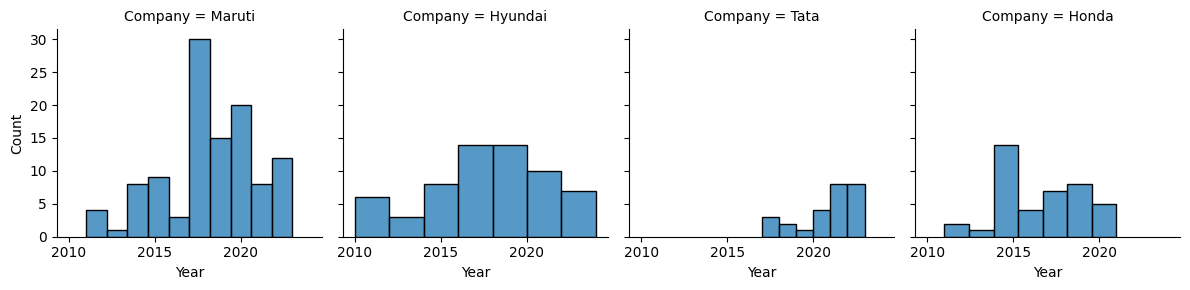

In [15]:
# plt.figure(figsize=(14,6))
# sns.countplot(data = df_comp, x = "Year", hue = "Transmission Type")
# plt.title("Year Count with Transmission Type")
# plt.show()

plt.figure(figsize=(5,6))
sns.FacetGrid(df_comp, col="Company").map_dataframe(sns.histplot, x="Year")
plt.show()

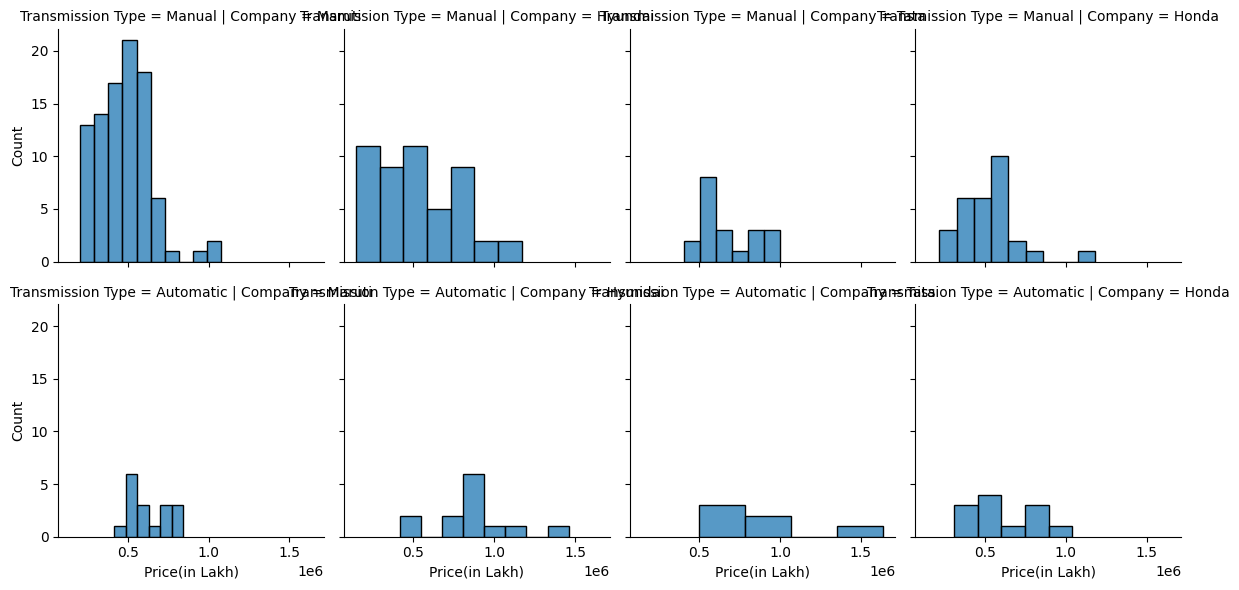

In [16]:
sns.FacetGrid(df_comp, col="Company", row="Transmission Type").map_dataframe(sns.histplot, x="Price(in Lakh)")
plt.show()

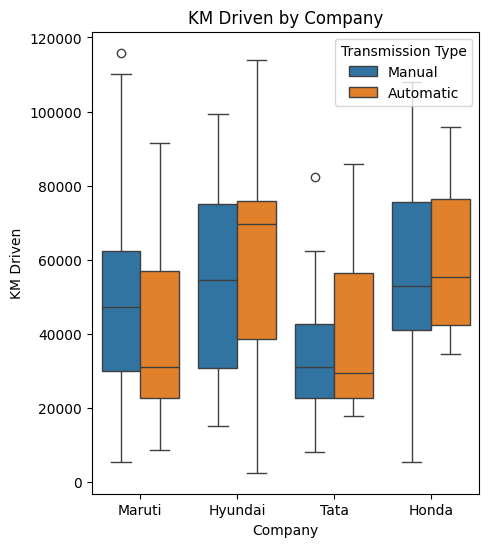

In [17]:
plt.figure(figsize=(5,6))
sns.boxplot(data=df_comp, y="KM Driven", x="Company", hue="Transmission Type")
plt.title("KM Driven by Company")
plt.show()

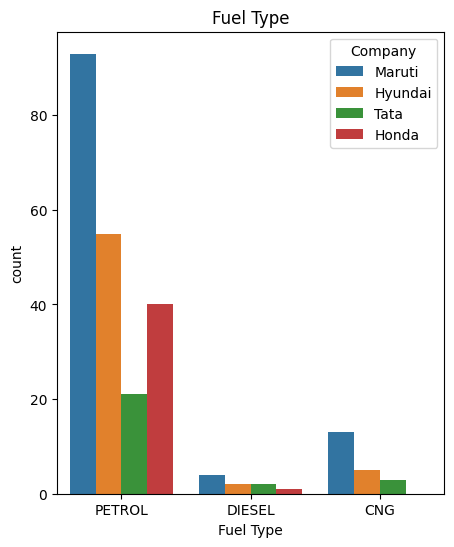

In [18]:
plt.figure(figsize=(5,6))
sns.countplot(data = df_comp, x = "Fuel Type", hue = "Company")
plt.title("Fuel Type")
plt.show()